In [1]:
# import
from nptdms import TdmsFile # https://nptdms.readthedocs.io/en/stable/
from matplotlib import pyplot as plt
import numpy as np
from collections import Counter
%matplotlib widget

In [2]:
# enter the different file names down below (make sure that the tdms files are saved in the according tdms folder)
file_names = ["Mike6_SF_pos_final1.tdms", 
              "Mike6_SF_pos_final2.tdms"]
amount = len(file_names)

In [3]:
# read in the tdms files
files = []
for i in range(0,amount):
    files.append(TdmsFile.read("tdms_files/"+file_names[i]))

In [4]:
# create list for positions
start = -90
step = 5
end = 90
number_of_positions = int((end-start)/step)
positions = []
positions.append(start)
for i in range(0,number_of_positions):
    positions.append(positions[i]+step)

In [5]:
# extract the final current setpoints and assign them to the correct position
final_setpoints = []
for i in range(0,amount):
    setpoint_signal = files[i]["StaticFriction"]["Final Current Setpoint [A]"][:]
    pos_setpoint = files[i]["StaticFriction"]["Position Setpoint [deg]"][:]
    apply_current = files[i]["StaticFriction"]["Apply Current"][:]
    setpoints = [0] * len(positions)
    for j in range(0,len(apply_current)-1):
        if apply_current[j] == 1 and apply_current[j+1] == 0:
            for a in range(0, len(positions)):
                if pos_setpoint[j] == positions[a]:
                    setpoints[a] = setpoint_signal[j+1]
    final_setpoints.append(setpoints)

In [6]:
# calculate average static friction
static_friction = [0] * len(positions)
torque_constant = 1  # Mike6: 0.0302 Nm/A; Mike1-5 & 7: 0.137 Nm/A
for i in range(0, len(positions)):
    values = []
    for j in range(0, amount):
        values.append(final_setpoints[j][i])
    static_friction[i] = max(values)
    static_friction[i] = static_friction[i]*torque_constant

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
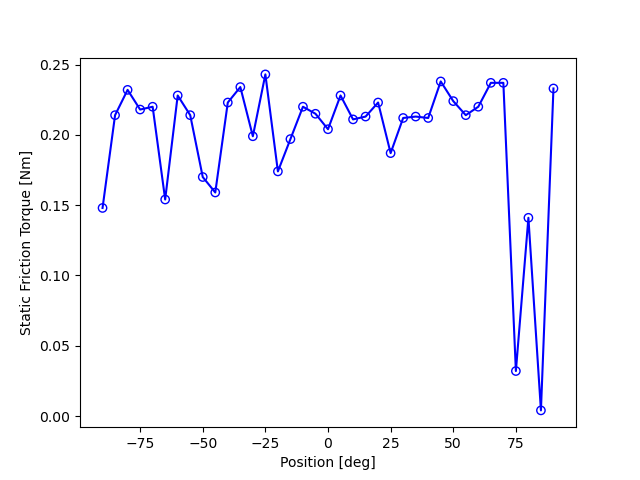

In [7]:
# plotting
plt.plot(positions,static_friction,'b')
plt.scatter(positions,static_friction, facecolors='none', edgecolors='b')
plt.xlabel("Position [deg]")
plt.ylabel("Static Friction Torque [Nm]")
plt.show()